In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
train = pd.read_csv("train.csv")

In [68]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [69]:
import warnings

In [70]:
warnings.filterwarnings('ignore')

In [71]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [72]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

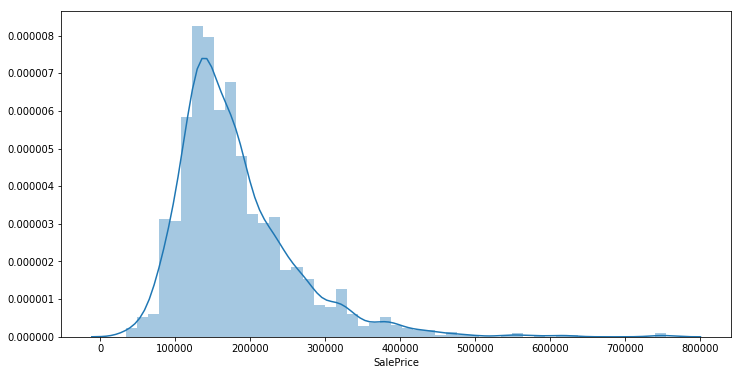

In [73]:
plt.figure(figsize=(12,6))
sns.distplot(train['SalePrice'])

In [74]:
train.SalePrice.skew()

1.8828757597682129

In [75]:
train.SalePrice.kurt()

6.5362818600645287

In [76]:
train.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

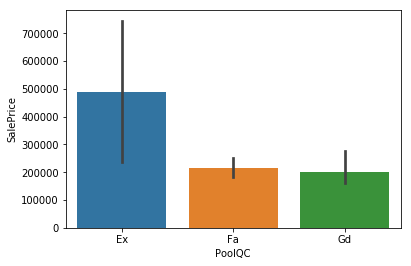

In [77]:
sns.barplot(x = train['PoolQC'], y = train['SalePrice'])

In [78]:
train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [79]:
def explore(column):
    return train[column].value_counts()

In [80]:
def impute(column,value):
    train.loc[train[column].isnull(),column] = value

In [81]:
explore('PoolQC')

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [82]:
impute('PoolQC','None')

In [83]:
def missing(column):
    return train[column].isnull().sum()

In [84]:
missing('PoolQC')

0

In [85]:
explore('PoolQC')

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [86]:
explore('MiscFeature')

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

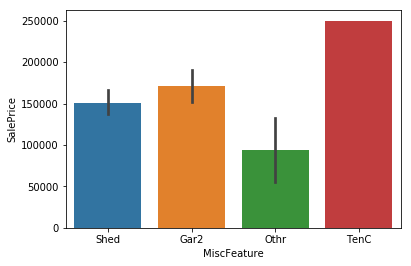

In [87]:
sns.barplot(x = train['MiscFeature'], y = train['SalePrice'])

In [88]:
impute('MiscFeature','None')

In [89]:
a = train.isnull().sum().sort_values(ascending=False).head(19)

In [90]:
explore('Alley')

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [91]:
impute('Alley','None')

In [92]:
explore('Fence')

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

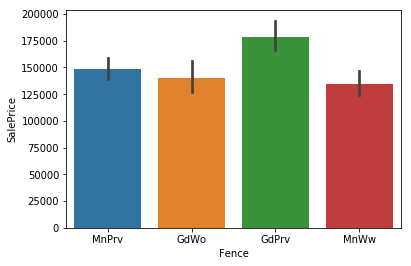

In [93]:
sns.barplot(x = train['Fence'], y = train['SalePrice'])

In [94]:
impute('Fence','None')

In [95]:
explore('Fence')

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [96]:
explore('FireplaceQu')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

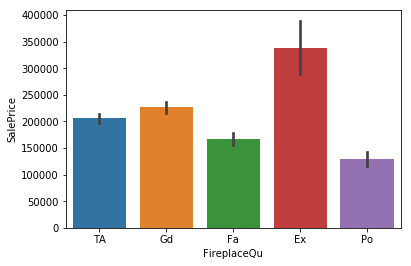

In [97]:
sns.barplot(x = train['FireplaceQu'], y = train['SalePrice'])

In [98]:
impute('FireplaceQu','None')

In [99]:
train.isnull().sum().sort_values(ascending=False).head(14)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [100]:
train['LotFrontage'].corr(np.sqrt(train['LotArea']))

0.6020022167939364

In [101]:
train['SqrtLotArea'] = np.sqrt(train['LotArea'])

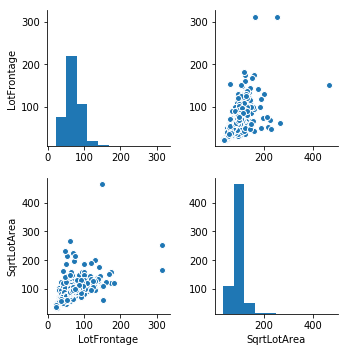

In [102]:
sns.pairplot(train[['LotFrontage','SqrtLotArea']].dropna())

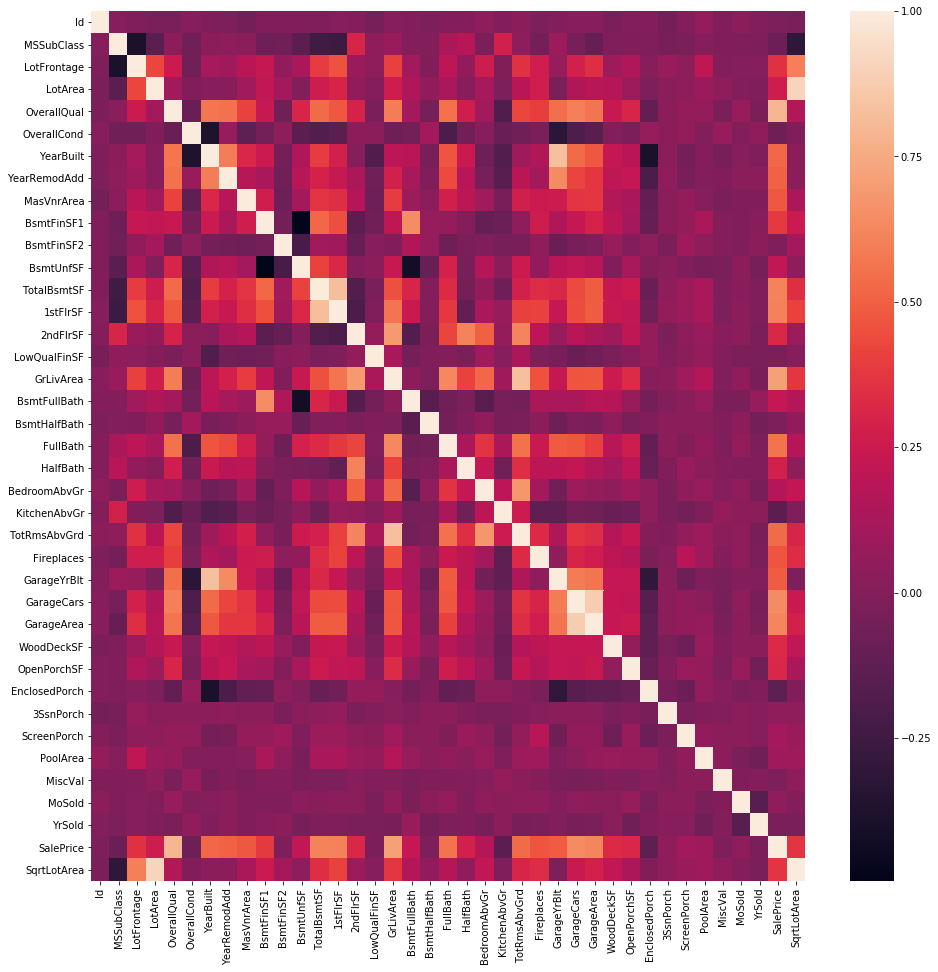

In [103]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr())

In [104]:
cond = train['LotFrontage'].isnull()

In [105]:
train.LotFrontage[cond] = train.SqrtLotArea[cond]

In [106]:
train.isnull().sum().sort_values(ascending=False).head(14)

GarageYrBlt     81
GarageCond      81
GarageFinish    81
GarageQual      81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
OverallCond      0
dtype: int64

In [107]:
train[['GarageYrBlt','GarageCond','GarageFinish','GarageQual','GarageType']][train['GarageYrBlt'].isnull()]

,GarageYrBlt,GarageCond,GarageFinish,GarageQual,GarageType
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [108]:
impl = ['GarageYrBlt','GarageCond','GarageFinish','GarageQual','GarageType']
for i in impl:
    impute(i,'None')

In [109]:
train.isnull().sum().sort_values(ascending=False).head(8)

BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [110]:
train[['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']][train['BsmtFinType1'].isnull()].head()

,BsmtFinType2,BsmtExposure,BsmtQual,BsmtFinType1,BsmtCond
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN


In [111]:
impl2 = ['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']
for i in impl2:
    impute(i,'None')

In [112]:
train.isnull().sum().sort_values(ascending=False).head(3)

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64

In [113]:
train[['MasVnrType','MasVnrArea']][train['MasVnrType'].isnull()]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [114]:
train['MasVnrArea'][235]

604.0

In [115]:
impute('MasVnrType','None')

In [116]:
impute('MasVnrArea',0.0)

In [117]:
train.isnull().sum().sort_values(ascending=False).head(1)

Electrical    1
dtype: int64

In [118]:
explore('Electrical')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [119]:
train['Electrical'][train['Electrical'].isnull()]

1379    NaN
Name: Electrical, dtype: object

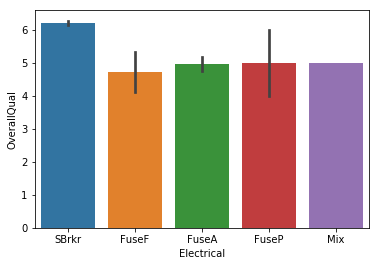

In [120]:
sns.barplot(train['Electrical'],train['OverallQual'])

In [121]:
train['OverallQual'][1379]

5

In [122]:
impute('Electrical','SBrkr')

In [123]:
explore('Electrical')

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [124]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,119.415242


In [126]:
train.isnull().sum().sort_values(ascending=False).head(3)

SqrtLotArea     0
YearRemodAdd    0
RoofMatl        0
dtype: int64

In [127]:
train.to_csv('miss_values_cleaned.csv',index = False)